In [1]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from scipy.stats import pearsonr, spearmanr
#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

path_extracted_data = config.path_extracted_data
id_run = config.id_run
path_adapt = os.path.join(path_extracted_data,'Adaptability')
print(id_run)

ALLDATA_


# Download BLUPS - intercept, plasticity, variability

In [3]:
#download ind.plasticity over time
df_BLUP_var = pd.read_csv(os.path.join(path_adapt,'BLUPS_variability0_pred.csv'), sep=',')
print(df_BLUP_var.shape) #2500 samples, for each each including ther 336 estimated parameters
display(df_BLUP_var.head(3))

print(list(df_BLUP_var.columns))
#sd_HenID__sigma_Intercept: is the estimate for individual differences in residual variance
#XchainID.*
#b_sigma_Intercept: is the population level estimate of the residual variance
li_col = [x for x in df_BLUP_var.columns if 'r_HenID__sigma' in x] #sigma =  residual part of the variance
df_BLUP_var = df_BLUP_var[li_col]#+ ['b_sigma_Intercept']]
#add population level estimate of the residual variance
#for c in li_col:
#    df_BLUP_var[c] = df_BLUP_var.apply(lambda x: x[c]+x['b_sigma_Intercept'], axis=1)
#doe snot change anything, to keep simple we wont add the pop. level estiamte
display(df_BLUP_var.head(3))

#melt data for simplicity
df_BLUP_var['run'] = df_BLUP_var.index
df_BLUP_var = pd.melt(df_BLUP_var, id_vars=['run'], value_vars=li_col)
df_BLUP_var['HenID'] = df_BLUP_var['variable'].map(lambda x: x.split('r_HenID__sigma.')[1].split('.')[0])
#"Importantly, in order to assess whether individuals differ in variance the residual part of the model iscalculated on the log 
#scale! In order to interpret rIIV in biological terms we backtransform rIIV by takingit’s original scale by taking its exponent"
df_BLUP_var['Variability'] = df_BLUP_var['value'].map(lambda x: np.exp(x))
df_BLUP_var['Predictability'] = df_BLUP_var['Variability'].map(lambda x: x*(-1))
print(df_BLUP_var.shape)
#each run has 80 hens * 10 chain (800 rows)
#df_BLUP_var[df_BLUP_var['run']==0]
df_BLUP_var.head(3)

(8334, 3410)


,X1.b_Intercept,X1.b_sigma_Intercept,X1.b_time,X1.b_time2,X1.b_TreatmentOFH,X1.b_temperature_C_avg_scale,X1.b_sigma_time,X1.b_sigma_time2,X1.b_sigma_TreatmentOFH,X1.b_sigma_temperature_C_avg_scale,...,X10.r_HenID__sigma.hen_85.Intercept.,X10.r_HenID__sigma.hen_87.Intercept.,X10.r_HenID__sigma.hen_9.Intercept.,X10.r_HenID__sigma.hen_90.Intercept.,X10.r_HenID__sigma.hen_92.Intercept.,X10.r_HenID__sigma.hen_95.Intercept.,X10.r_HenID__sigma.hen_97.Intercept.,X10.r_HenID__sigma.hen_98.Intercept.,X10.r_HenID__sigma.hen_99.Intercept.,X10.lp__
0,-0.487604,-0.402776,0.973027,-0.241320,-0.349758,-0.051588,-0.018391,-0.071007,-0.058844,0.028033,...,-0.045018,0.278245,-0.188997,0.266686,0.109263,-0.401039,-0.073058,0.106159,-0.275771,-2503.749454
1,-0.585886,-0.414933,1.072083,-0.240398,-0.288871,-0.054558,-0.049464,-0.056232,-0.126719,0.036610,...,0.291800,0.220126,-0.056462,0.120657,0.063677,-0.130329,0.011630,0.072115,-0.071715,-2554.223671
2,-0.344724,-0.352599,1.010160,-0.235717,-0.539759,-0.026497,-0.125561,-0.038701,-0.141354,0.060235,...,0.044993,0.166598,-0.325361,-0.003502,0.117427,-0.157880,-0.425598,0.083381,0.044226,-2550.531880


['X1.b_Intercept', 'X1.b_sigma_Intercept', 'X1.b_time', 'X1.b_time2', 'X1.b_TreatmentOFH', 'X1.b_temperature_C_avg_scale', 'X1.b_sigma_time', 'X1.b_sigma_time2', 'X1.b_sigma_TreatmentOFH', 'X1.b_sigma_temperature_C_avg_scale', 'X1.sd_HenID__Intercept', 'X1.sd_HenID__time', 'X1.sd_HenID__time2', 'X1.sd_HenID__sigma_Intercept', 'X1.cor_HenID__Intercept__time', 'X1.cor_HenID__Intercept__time2', 'X1.cor_HenID__time__time2', 'X1.cor_HenID__Intercept__sigma_Intercept', 'X1.cor_HenID__time__sigma_Intercept', 'X1.cor_HenID__time2__sigma_Intercept', 'X1.r_HenID.hen_10.Intercept.', 'X1.r_HenID.hen_101.Intercept.', 'X1.r_HenID.hen_102.Intercept.', 'X1.r_HenID.hen_106.Intercept.', 'X1.r_HenID.hen_107.Intercept.', 'X1.r_HenID.hen_109.Intercept.', 'X1.r_HenID.hen_112.Intercept.', 'X1.r_HenID.hen_116.Intercept.', 'X1.r_HenID.hen_118.Intercept.', 'X1.r_HenID.hen_119.Intercept.', 'X1.r_HenID.hen_124.Intercept.', 'X1.r_HenID.hen_127.Intercept.', 'X1.r_HenID.hen_128.Intercept.', 'X1.r_HenID.hen_13.Interc

,X1.r_HenID__sigma.hen_10.Intercept.,X1.r_HenID__sigma.hen_101.Intercept.,X1.r_HenID__sigma.hen_102.Intercept.,X1.r_HenID__sigma.hen_106.Intercept.,X1.r_HenID__sigma.hen_107.Intercept.,X1.r_HenID__sigma.hen_109.Intercept.,X1.r_HenID__sigma.hen_112.Intercept.,X1.r_HenID__sigma.hen_116.Intercept.,X1.r_HenID__sigma.hen_118.Intercept.,X1.r_HenID__sigma.hen_119.Intercept.,...,X10.r_HenID__sigma.hen_84.Intercept.,X10.r_HenID__sigma.hen_85.Intercept.,X10.r_HenID__sigma.hen_87.Intercept.,X10.r_HenID__sigma.hen_9.Intercept.,X10.r_HenID__sigma.hen_90.Intercept.,X10.r_HenID__sigma.hen_92.Intercept.,X10.r_HenID__sigma.hen_95.Intercept.,X10.r_HenID__sigma.hen_97.Intercept.,X10.r_HenID__sigma.hen_98.Intercept.,X10.r_HenID__sigma.hen_99.Intercept.
0,0.017452,0.115267,-0.220349,0.412432,0.321030,0.468429,-0.086234,-0.176554,-0.010539,0.039291,...,0.200185,-0.045018,0.278245,-0.188997,0.266686,0.109263,-0.401039,-0.073058,0.106159,-0.275771
1,0.181898,0.429418,-0.475571,0.429450,0.469265,0.681417,0.032378,-0.255249,0.146933,0.038215,...,0.137123,0.291800,0.220126,-0.056462,0.120657,0.063677,-0.130329,0.011630,0.072115,-0.071715
2,0.171663,0.294926,-0.331497,0.418552,0.399949,0.657787,0.073380,-0.038833,0.151138,0.213504,...,0.076867,0.044993,0.166598,-0.325361,-0.003502,0.117427,-0.157880,-0.425598,0.083381,0.044226


(6667200, 6)


,run,variable,value,HenID,Variability,Predictability
0,0,X1.r_HenID__sigma.hen_10.Intercept.,0.017452,hen_10,1.017606,-1.017606
1,1,X1.r_HenID__sigma.hen_10.Intercept.,0.181898,hen_10,1.199492,-1.199492
2,2,X1.r_HenID__sigma.hen_10.Intercept.,0.171663,hen_10,1.187278,-1.187278


In [4]:
#download BLUPS intercepts
df_BLUP_int = pd.read_csv(os.path.join(path_adapt,'BLUP_RI.csv'), sep=',')
df_BLUP_int.rename(columns={'mean':'BLUPIntercept'},inplace=True)
print(df_BLUP_int.shape)
df_BLUP_int.head(3)

(80, 6)


,groupFctr,groupID,term,BLUPIntercept,median,sd
0,HenID,hen_10,(Intercept),-0.462990,-0.457868,0.192958
1,HenID,hen_101,(Intercept),0.504909,0.504094,0.186326
2,HenID,hen_102,(Intercept),-1.371668,-1.365408,0.170115


In [5]:
#download BLUPS slope (linear and quadratic)
df_BLUP_RR = pd.read_csv(os.path.join(path_adapt,'BLUP_RR.csv'), sep=',')
display(df_BLUP_RR['term'].unique())
dico_ = {'(Intercept)':'BLUP_int', 
         'time':'BLUP_slopes1', 
         'time2':'BLUP_slopes2'}
df_BLUP_RR['term'] = df_BLUP_RR['term'].map(lambda x: dico_[x])
print(df_BLUP_RR.shape)
print(df_BLUP_RR['groupFctr'].unique(), df_BLUP_RR['term'].unique())
df_BLUP_RR.head(3)

array(['(Intercept)', 'time', 'time2'], dtype=object)

(240, 6)
['HenID'] ['BLUP_int' 'BLUP_slopes1' 'BLUP_slopes2']


,groupFctr,groupID,term,mean,median,sd
0,HenID,hen_10,BLUP_int,-0.586199,-0.601151,0.429258
1,HenID,hen_101,BLUP_int,1.332849,1.341114,0.499688
2,HenID,hen_102,BLUP_int,-1.050846,-1.034537,0.461958


# Select individuals to highlight in visuals

In [6]:
#select 5 hens to highlight within the plot: two most extremes intercept (min, max), two most extreme plasticity (min, max) 
#and one?

#Behavioural type
li = df_BLUP_int.sort_values('BLUPIntercept', ascending=True)['groupID'].tolist()
li_int = [li[-1], li[0]]
print(li_int)

#Plasticity
li1 = df_BLUP_RR[df_BLUP_RR['term']=='BLUP_slopes1'].sort_values('mean', ascending=True)['groupID'].tolist()
li2 = df_BLUP_RR[df_BLUP_RR['term']=='BLUP_slopes2'].sort_values('mean', ascending=True)['groupID'].tolist()
li_plasticity1 = [li1[0]] #for visibility purposes: does not add anything to the plot except removing visibility: li1[-1]
li_plasticity2 = [li2[-1], li2[0]]
print(li_plasticity1)
print(li_plasticity2)

#predictability
df_BLUP_var_summarized = df_BLUP_var.groupby('HenID')['Predictability'].agg(lambda x: list(x)).reset_index()
df_BLUP_var_summarized['Predictability_mean'] = df_BLUP_var_summarized['Predictability'].map(lambda x: np.mean(x))
df_BLUP_var_summarized['Predictability_sd'] = df_BLUP_var_summarized['Predictability'].map(lambda x: np.std(x))
display(df_BLUP_var_summarized.head(3))
li = df_BLUP_var_summarized.sort_values('Predictability_mean')['HenID'].tolist()
li_pred = [li[-1], li[0]]
print(li_pred)

#selected hens: for visibility purposes we cannot show all hens
li_hen_visual = list(set(li_int+li_plasticity2)) 
print('selected hens: %s' %' '.join(li_hen_visual))

['hen_9', 'hen_145']
['hen_5']
['hen_69', 'hen_109']


,HenID,Predictability,Predictability_mean,Predictability_sd
0,hen_10,"[-1.0176055718243788, -1.1994922607609264, -1....",-1.038280,0.112738
1,hen_101,"[-1.1221725672194474, -1.5363625570416004, -1....",-1.361887,0.156616
2,hen_102,"[-0.8022388204168472, -0.6215303576634553, -0....",-0.635288,0.078090


['hen_145', 'hen_109']
selected hens: hen_9 hen_145 hen_69 hen_109


In [7]:
#higher score means higher dispertion so we want brither for higher score
df_henorder = df_BLUP_var_summarized[df_BLUP_var_summarized['HenID'].isin(li_hen_visual)].sort_values(['Predictability_mean'], 
                                                                                              ascending=True)
display(df_henorder)
li_hen_order = df_henorder['HenID'].tolist()

,HenID,Predictability,Predictability_mean,Predictability_sd
5,hen_109,"[-1.597481809223428, -1.9766772688133487, -1.9...",-1.695992,0.191910
61,hen_69,"[-1.2354341300122667, -1.4618116338604756, -1....",-1.281980,0.139682
73,hen_9,"[-0.6369065013091803, -0.9197935451853531, -0....",-0.747125,0.088016
23,hen_145,"[-0.5847526109949581, -0.5253454615899612, -0....",-0.568843,0.070712


In [8]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#define the color based on the predictability for visual purposes: more predictable darker, less predictbale brighter
#'crimson','olive','orangered',
#li_nicecolor_brighter = ['blue','fuchsia','orange','lime','cyan','yellow'] #art
li_nicecolor_brighter = ['mediumblue','deeppink','goldenrod','green','cyan','yellow']

#exchange two colors for visual purpose, no rule to implement
#li_nicecolor_brighter = ['blue','fuchsia','orange','lime','cyan','yellow','crimson','olive'] #art
li_nicecolor_brighter = ['mediumblue','deeppink','goldenrod','green','cyan','yellow','crimson','olive'] #art
li_all_hen =  df_BLUP_RR['groupID'].unique()
pal_ = {henID:'black' for henID in li_all_hen}
pal_ = {'Other Hens':'black'}
for i,henID in enumerate(li_hen_order):
    pal_[henID] = li_nicecolor_brighter[i]

# Visualise Estimates

C:\Users\camil\AppData\Local\Temp/ipykernel_16656/354407454.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['BLUPIntercept'], yerr=df_plt['sd'], fmt=' ', alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/354407454.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['BLUPIntercept'], yerr=df_plt['sd'], fmt=' ', alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/354407454.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'],

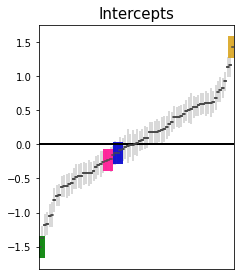

In [9]:
#behavioural type
df_plt = df_BLUP_int.sort_values(['BLUPIntercept'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
#hue_order = li_hen_visual + ['Other Hens']
plt.figure(figsize=(3.5,4.5))
ax = sns.boxplot(x='groupID', y='BLUPIntercept', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['BLUPIntercept'], yerr=df_plt['sd'], fmt=' ', alpha=0.2, 
            ecolor=df_plt['color']);
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['BLUPIntercept'], yerr=df_plt_['sd'], fmt=' ', alpha=0.9, elinewidth=10,
ecolor=df_plt_['color']);
plt.xticks([]) #remove xlabel annotations
plt.xlabel('')
plt.ylabel('')
plt.title('Intercepts', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_adapt,'BLUPs_intercepts.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\AppData\Local\Temp/ipykernel_16656/4196866395.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/4196866395.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/4196866395.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['group

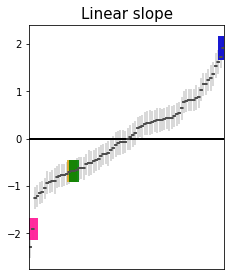

In [10]:
#plasticity
df_plt = df_BLUP_RR[df_BLUP_RR['term']=='BLUP_slopes1'].sort_values(['mean'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
plt.figure(figsize=(3.5,4.5))
ax = sns.boxplot(x='groupID', y='mean', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2, 
            ecolor=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['mean'], yerr=df_plt_['sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            ecolor=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('')
plt.ylabel('')
plt.title('Linear slope', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_adapt,'BLUPS_linear_slope.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\AppData\Local\Temp/ipykernel_16656/534138934.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/534138934.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/534138934.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['groupID'

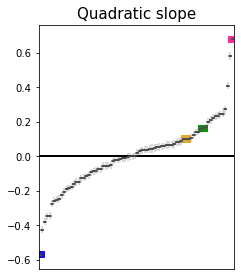

In [11]:
#plasticity
df_plt = df_BLUP_RR[df_BLUP_RR['term']=='BLUP_slopes2'].sort_values(['mean'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
plt.figure(figsize=(3.5,4.5))
ax = sns.boxplot(x='groupID', y='mean', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2, 
            ecolor=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['mean'], yerr=df_plt_['sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            ecolor=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('')
plt.ylabel('')
plt.title('Quadratic slope', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_adapt,'BLUPS_quadratic_slope.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\AppData\Local\Temp/ipykernel_16656/1712250246.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['HenID'], df_plt['Predictability_mean'], yerr=df_plt['Predictability_sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/1712250246.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.errorbar(df_plt['HenID'], df_plt['Predictability_mean'], yerr=df_plt['Predictability_sd'],fmt=' ', zorder=-1, alpha=0.2,
C:\Users\camil\AppData\Local\Temp/ipykernel_16656/1712250246.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use

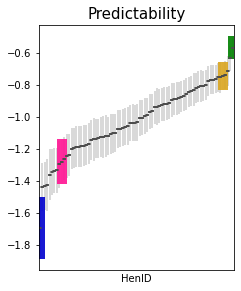

,HenID,Predictability,Predictability_mean,Predictability_sd
5,hen_109,"[-1.597481809223428, -1.9766772688133487, -1.9...",-1.695992,0.191910
61,hen_69,"[-1.2354341300122667, -1.4618116338604756, -1....",-1.281980,0.139682
73,hen_9,"[-0.6369065013091803, -0.9197935451853531, -0....",-0.747125,0.088016
23,hen_145,"[-0.5847526109949581, -0.5253454615899612, -0....",-0.568843,0.070712


In [12]:
#predictability
df_plt = df_BLUP_var_summarized.sort_values(['Predictability_mean']).copy()
df_plt[' '] = df_plt['HenID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
#hue_order = li_hen_visual + ['Other Hens']
plt.figure(figsize=(3.5,4.5))
ax = sns.boxplot(x='HenID', y='Predictability_mean', data=df_plt, color='grey');
ax.errorbar(df_plt['HenID'], df_plt['Predictability_mean'], yerr=df_plt['Predictability_sd'],fmt=' ', zorder=-1, alpha=0.2, 
            ecolor=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['HenID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['HenID'], df_plt_['Predictability_mean'], yerr=df_plt_['Predictability_sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            ecolor=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('HenID')
plt.ylabel('')
plt.title('Predictability', size=15);
plt.savefig(os.path.join(path_adapt,'BLUPS_predictability.png'), bbox_inches='tight')
plt.show();
df_BLUP_varorder = df_BLUP_var_summarized[df_BLUP_var_summarized['HenID'].isin(li_hen_visual)].sort_values(['Predictability_mean'], ascending=True).copy()
display(df_BLUP_varorder)
#li_orderedhenselected_pred = df_BLUP_varorder['HenID'].tolist()
#hens with higher rIIV are less predictable than individualswith lower rIIV (Fig )
#The most predictable individual (hen 39) has an average residual variance of 0.01 around its behavioral mean, whereas the 
#least predictable individual (hen 109) has an average residual variance of 0.27km

# Visualise Raw & Predictions data

In [13]:
pal_all = {k.split(':')[0]:v for k,v in pal_.items()}
hue_order_all=[h.split(':')[0] for h in li_hen_visual]+['Other Hens']

Other Hens    3070
hen_69          43
hen_145         42
hen_9           42
hen_109         33
Name: HenID , dtype: int64

(3230, 36)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,cDIB,temperature_C_avg_scale,time,time2,time3,avgDIB_scale,InitialWeight_scale,pred_pop,pred_HenID,HenID
0,hen_134,11,MEXP,pen10,11.500000,1,1112,TRAN,100,0,...,0,0.208097,0.000000,0.000000,0.000000,-0.367755,-0.914296,-0.581911,-1.006008,Other Hens
1,hen_134,12,MEXP,pen10,10.166667,0,1112,TRAN,86,0,...,1,-0.211212,0.081155,0.006586,0.000534,-0.367755,-0.914296,-0.485739,-0.909836,Other Hens
2,hen_134,13,MEXP,pen10,9.000000,0,1112,TRAN,100,0,...,2,-0.578107,0.162309,0.026344,0.004276,-0.367755,-0.914296,-0.394108,-0.818205,Other Hens


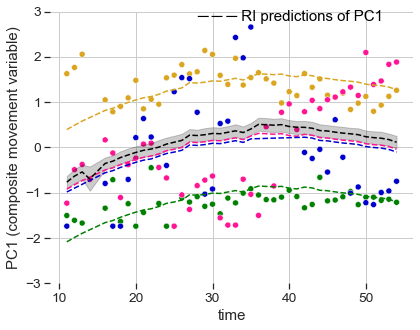

In [24]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_adapt,'Prediction_RI.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('time')
plt.text(28, 2.8, '─ ─ ─ RI predictions of PC1', color='black')
plt.ylim((-3,3))
plt.savefig(os.path.join(path_adapt,'Raw&predicionRI.png'), bbox_inches='tight')

Other Hens    3070
hen_69          43
hen_145         42
hen_9           42
hen_109         33
Name: HenID , dtype: int64

(3230, 36)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,cDIB,temperature_C_avg_scale,time,time2,time3,avgDIB_scale,InitialWeight_scale,pred_pop,pred_HenID,HenID
0,hen_134,11,MEXP,pen10,11.500000,1,1112,TRAN,100,0,...,0,0.208097,0.000000,0.000000,0.000000,-0.367755,-0.914296,-0.593008,-1.840952,Other Hens
1,hen_134,12,MEXP,pen10,10.166667,0,1112,TRAN,86,0,...,1,-0.211212,0.081155,0.006586,0.000534,-0.367755,-0.914296,-0.494215,-1.706140,Other Hens
2,hen_134,13,MEXP,pen10,9.000000,0,1112,TRAN,100,0,...,2,-0.578107,0.162309,0.026344,0.004276,-0.367755,-0.914296,-0.400097,-1.576002,Other Hens


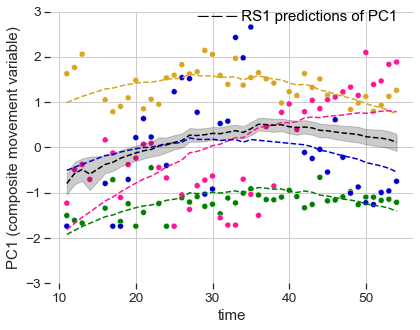

In [25]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_adapt,'Prediction_RR_linear.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('time')
plt.text(28, 2.8, '─ ─ ─ RS1 predictions of PC1', color='black')
plt.ylim((-3,3))
plt.savefig(os.path.join(path_adapt,'Raw&predictionRS1.png'), bbox_inches='tight')

Other Hens    3070
hen_69          43
hen_145         42
hen_9           42
hen_109         33
Name: HenID , dtype: int64

(3230, 36)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,cDIB,temperature_C_avg_scale,time,time2,time3,avgDIB_scale,InitialWeight_scale,pred_pop,pred_HenID,HenID
0,hen_134,11,MEXP,pen10,11.500000,1,1112,TRAN,100,0,...,0,0.208097,0.000000,0.000000,0.000000,-0.367755,-0.914296,-0.631429,-1.920829,Other Hens
1,hen_134,12,MEXP,pen10,10.166667,0,1112,TRAN,86,0,...,1,-0.211212,0.081155,0.006586,0.000534,-0.367755,-0.914296,-0.530077,-1.775826,Other Hens
2,hen_134,13,MEXP,pen10,9.000000,0,1112,TRAN,100,0,...,2,-0.578107,0.162309,0.026344,0.004276,-0.367755,-0.914296,-0.433534,-1.635993,Other Hens


,HenID,pred_HenID,PC1,diff,max_error
0,hen_10,"[0.429243125485483, 0.410231574229223, 0.36487...","[0.0617182970403908, 0.535233840014037, 0.6118...","[0.3675248284450922, 0.12500226578481394, 0.24...",1.043797
1,hen_101,"[-0.0318597065066978, 0.0536528755862544, 0.11...","[0.722654827284217, 0.693184418813745, 0.54033...","[0.7545145337909148, 0.6395315432274906, 0.429...",1.321515
2,hen_102,"[-1.10377691058963, -1.08014134066411, -1.0837...","[-0.783997251768188, -0.999198002587304, -1.10...","[0.319779658821442, 0.08094333807680609, 0.019...",0.498763


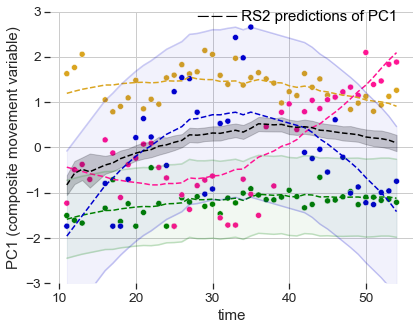

In [26]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_adapt,'Prediction_RR_quadratic.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)

#add max error
df_PL = df_PL.sort_values(['DIB'], ascending=False)
df_ = df_PL.groupby('HenID')[['pred_HenID','PC1']].agg(lambda x: list(x)).reset_index()
df_['diff'] = df_.apply(lambda x: [abs(x['pred_HenID'][i]-x['PC1'][i]) for i in range(0,len(x['pred_HenID']))], axis=1)
df_['max_error'] = df_['diff'].map(lambda x: max(x))
display(df_.head(3))
df_PL['max_error'] = df_PL['HenID'].map(lambda x: df_[df_['HenID']==x]['max_error'].values[0])
for henID in ['hen_109', 'hen_145']:
    y = df_PL[df_PL['HenID ']==henID]['pred_HenID']
    err = df_PL[df_PL['HenID ']==henID]['max_error']
    x = df_PL[df_PL['HenID ']==henID]['DIB']
    plt.plot(x, y-err, color=pal_[henID], alpha=0.2)
    plt.plot(x, y+err, color=pal_[henID], alpha=0.2)
    plt.fill_between(x, y-err, y+err, alpha=0.05, color=pal_[henID])
#plt.text(11, 1.4, '─ ─ ─ estimated slopes', color='black')
#remove all borders

#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('time')
plt.text(28, 2.8, '─ ─ ─ RS2 predictions of PC1', color='black')
plt.ylim((-3,3))
plt.savefig(os.path.join(path_adapt,'Raw&predictionRS2.png'), bbox_inches='tight')

Other Hens    3070
hen_69          43
hen_145         42
hen_9           42
hen_109         33
Name: HenID , dtype: int64

(3230, 36)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,cDIB,temperature_C_avg_scale,time,time2,time3,avgDIB_scale,InitialWeight_scale,pred_pop,pred_HenID,HenID
0,hen_134,11,MEXP,pen10,11.500000,1,1112,TRAN,100,0,...,0,0.208097,0.000000,0.000000,0.000000,-0.367755,-0.914296,-0.631429,-1.920829,Other Hens
1,hen_134,12,MEXP,pen10,10.166667,0,1112,TRAN,86,0,...,1,-0.211212,0.081155,0.006586,0.000534,-0.367755,-0.914296,-0.530077,-1.775826,Other Hens
2,hen_134,13,MEXP,pen10,9.000000,0,1112,TRAN,100,0,...,2,-0.578107,0.162309,0.026344,0.004276,-0.367755,-0.914296,-0.433534,-1.635993,Other Hens


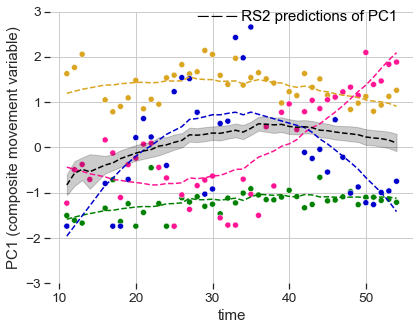

In [27]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_adapt,'Prediction_RR_quadratic.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)

#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('time')
plt.text(28, 2.8, '─ ─ ─ RS2 predictions of PC1', color='black')
plt.ylim((-3,3))
plt.savefig(os.path.join(path_adapt,'Raw&predictionRS2_nopredictabiltiy.png'), bbox_inches='tight')

#plot plasticity over time
#TODO: add pred_HenID1.4
sns.lineplot(x='DIB', y='pred_HenID1.4', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all);
plt.title('Individual plasticity');
plt.savefig(os.path.join(path_adapt,'EstimatedPlastictyOvertime.png'), bbox_inches='tight')

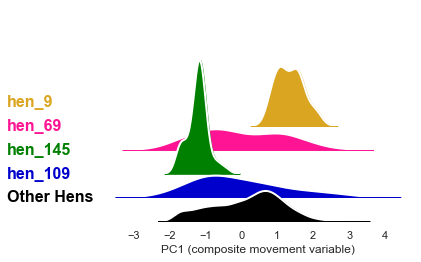

In [17]:
#all in once
#change order of hen just for visual purpose
df_PL = df_PL.sort_values(['HenID '], ascending=False)
#behavioural type
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(df_PL, row="HenID ", hue="HenID ", aspect=8, height=0.8, palette=pal_all)
#densities
g.map(sns.kdeplot, "PC1", fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "PC1", color="w", lw=2)
#Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.3, .2, label, fontweight="bold", fontsize=16, color=color, ha="left", va="center", transform=ax.transAxes)
g.map(label, "PC1")
#Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.8)

#remove axes info that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);
plt.xlabel('PC1 (composite movement variable)')
plt.savefig(os.path.join(path_adapt,'Rawdensity.png'), bbox_inches='tight') #, pad_inches=-0.1)
plt.show()

# Merge all individual information

In [18]:
display(df_BLUP_var_summarized.head(3))
df_ = df_BLUP_RR.pivot(columns='term', index='groupID',values='mean').reset_index()
display(df_.head(3))
df_BLUP_RRall = pd.merge(df_[['groupID','BLUP_slopes1','BLUP_slopes2']], df_BLUP_var_summarized, left_on='groupID', right_on='HenID', how='outer')
print(df_BLUP_RRall.shape)
display(df_BLUP_RRall.head(3))

,HenID,Predictability,Predictability_mean,Predictability_sd
0,hen_10,"[-1.0176055718243788, -1.1994922607609264, -1....",-1.038280,0.112738
1,hen_101,"[-1.1221725672194474, -1.5363625570416004, -1....",-1.361887,0.156616
2,hen_102,"[-0.8022388204168472, -0.6215303576634553, -0....",-0.635288,0.078090


term,groupID,BLUP_int,BLUP_slopes1,BLUP_slopes2
0,hen_10,-0.586199,-0.446985,0.208133
1,hen_101,1.332849,-0.524468,0.032831
2,hen_102,-1.050846,-0.512248,0.141956


(80, 7)


,groupID,BLUP_slopes1,BLUP_slopes2,HenID,Predictability,Predictability_mean,Predictability_sd
0,hen_10,-0.446985,0.208133,hen_10,"[-1.0176055718243788, -1.1994922607609264, -1....",-1.038280,0.112738
1,hen_101,-0.524468,0.032831,hen_101,"[-1.1221725672194474, -1.5363625570416004, -1....",-1.361887,0.156616
2,hen_102,-0.512248,0.141956,hen_102,"[-0.8022388204168472, -0.6215303576634553, -0....",-0.635288,0.078090


In [19]:
display(df_BLUP_int.head(3))
df_BLUP_RRall = pd.merge(df_BLUP_RRall, df_BLUP_int[['groupID','BLUPIntercept']], on='groupID', how='outer')
print(df_BLUP_RRall.shape)
df_BLUP_RRall.head(3)

,groupFctr,groupID,term,BLUPIntercept,median,sd
0,HenID,hen_10,(Intercept),-0.462990,-0.457868,0.192958
1,HenID,hen_101,(Intercept),0.504909,0.504094,0.186326
2,HenID,hen_102,(Intercept),-1.371668,-1.365408,0.170115


(80, 8)


,groupID,BLUP_slopes1,BLUP_slopes2,HenID,Predictability,Predictability_mean,Predictability_sd,BLUPIntercept
0,hen_10,-0.446985,0.208133,hen_10,"[-1.0176055718243788, -1.1994922607609264, -1....",-1.038280,0.112738,-0.462990
1,hen_101,-0.524468,0.032831,hen_101,"[-1.1221725672194474, -1.5363625570416004, -1....",-1.361887,0.156616,0.504909
2,hen_102,-0.512248,0.141956,hen_102,"[-0.8022388204168472, -0.6215303576634553, -0....",-0.635288,0.078090,-1.371668


# Dataframe for stats ~ health

In [20]:
li_selected_hens = pickle.load(open(os.path.join(path_adapt, 'li_selected_hens.pkl'), 'rb'))
print(len(li_selected_hens))

80


In [21]:
#HA&KBF&weight
df_HA = pd.read_csv(os.path.join(path_extracted_data, 'df_all_HA.csv'), sep=';', parse_dates=['date'], dayfirst=True) 
print(df_HA.shape)
df_HA = df_HA[df_HA['HenID'].isin(li_selected_hens)]
#display(df_HA.groupby(['HAID'])['date'].agg(lambda x: set(x)).reset_index())
display(df_HA['HAID'].value_counts())
#info on date
display(df_HA.groupby(['HAID','date','WOA','DOA'])['HenID'].count().reset_index())
print(df_HA.shape)
df_HA.head(3)

(846, 58)


HA2    80
HA5    80
HA1    80
HA3    80
HA4    80
Name: HAID, dtype: int64

,HAID,date,WOA,DOA,HenID
0,HA1,2020-11-23,25.0,173.0,80
1,HA2,2021-01-04,31.0,215.0,80
2,HA3,2021-02-01,35.0,243.0,80
3,HA4,2021-04-12,45.0,313.0,80
4,HA5,2021-07-25,60.0,417.0,80


(400, 58)


,Person_toe,Time,PenID,FocalLegringName,BirdType,CombPecks,Toes,RFPododermatitis,RFBumblefoot,RFinjuries,...,actual_path_img,imageID,random_order1,severity,has_gap,BirdID,uncertainty (0:certain:1 random),Unnamed: 9,Info,backpack
4,C,08:58,pen12,32orange,normal,25.0,NaN,0.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,68.0,319.0,2,0.0,32orange12sb,NaN,NaN,"['', '32', 'orange', '12', 'sb']",sb
6,C,NaN,pen5,41grey,normal,20.0,0,0.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,42.0,192.0,84,0.0,41grey5gwb,NaN,NaN,"['', '41', 'grey', '5', 'gwb']",gwb
14,M,10:23,pen8,71black,normal,25.0,NaN,0.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,311.0,255.0,12,0.0,71black8ps,NaN,NaN,"['', '71', 'black', '8', 'ps']",ps


In [32]:
##### to add info on the first week
df_MVT_ALL = pd.read_csv(os.path.join(path_extracted_data, id_run+'_daily_ALL_variables_verified_earlymvt.csv'), sep=';', 
                     parse_dates=['level'], dayfirst=True) 
print(df_MVT_ALL.shape)
df_MVT_ALL = df_MVT_ALL[df_MVT_ALL['HenID'].isin(li_selected_hens)]
#restrict to the adaptability study timeframe
df_MVT_ALL = df_MVT_ALL[df_MVT_ALL['level']<=config.max_date_adaptability]
print(df_MVT_ALL.shape)
#make sure we have their mvt
df_MVT_ALL = df_MVT_ALL[~df_MVT_ALL['perc_duration_5_Zone'].isnull()]
print(df_MVT_ALL.shape)
df_MVT_ALL.head(3)

(42300, 63)
(3750, 63)
(3750, 63)


,HenID,PenID,CLASS,TagID,FocalLegringName,R-Pen,InitialStartDate,Treatment,level,DIB,...,percChaoticTransition,night_Max_duration_zones,is_mvt_night,empproba_3_Zone,empproba_4_Zone,empproba_2_Zone,in_WG_15mnAfterOpening,Max_duration_WG_h,perc_1_Zone_while_WG_open,SleepingHeight
114,hen_134,pen10,MEXP,tag_122,22black,4.0,2020-06-10 00:00:00,TRAN,2020-09-30,1,...,18.0,5_Zone,0.0,80.0,20.0,100.0,NaN,NaN,NaN,3
115,hen_134,pen10,MEXP,tag_122,22black,4.0,2020-06-10 00:00:00,TRAN,2020-10-01,2,...,0.0,5_Zone,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3
116,hen_134,pen10,MEXP,tag_122,22black,4.0,2020-06-10 00:00:00,TRAN,2020-10-02,3,...,0.0,3_Zone,1.0,50.0,25.0,100.0,NaN,NaN,NaN,1


In [34]:
##### mvt since DIB 11
df_MVT = pd.read_csv(os.path.join(path_adapt,'df_MVT_4individuality.csv'), sep=';')
print(df_MVT.shape)
df_MVT.head(3)

(3230, 25)


,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh,DIB_startat11,avgDIB,severity,Feathers
0,hen_134,11,MEXP,pen10,11.500000,1,1112.0,TRAN,100.0,0.0,...,0.0,0.1,0.0,0,3,0.0,0,22.357143,34,73.0
1,hen_134,12,MEXP,pen10,10.166667,0,1112.0,TRAN,86.0,0.0,...,0.1,0.2,0.0,0,3,0.6,1,22.357143,34,73.0
2,hen_134,13,MEXP,pen10,9.000000,0,1112.0,TRAN,100.0,0.0,...,0.0,0.1,0.0,0,3,0.0,2,22.357143,34,73.0


In [35]:
df_MVT['SleepingHeight'].value_counts()

3    2203
1     610
2     398
0      19
Name: SleepingHeight, dtype: int64

In [36]:
df_MVT_ALL.columns

Index(['HenID', 'PenID', 'CLASS', 'TagID', 'FocalLegringName', 'R-Pen',
       'InitialStartDate', 'Treatment', 'level', 'DIB', 'WIB', 'DOA', 'WOA',
       'verification_daily_total_duration', 'TrackingSystemID',
       'perc_duration_2_Zone', 'perc_duration_3_Zone', 'perc_duration_4_Zone',
       'perc_duration_5_Zone', 'duration_1_Zone', 'duration_2_Zone',
       'duration_3_Zone', 'duration_4_Zone', 'duration_5_Zone',
       'nbr_stays_1_Zone', 'nbr_stays_2_Zone', 'nbr_stays_3_Zone',
       'nbr_stays_4_Zone', 'nbr_stays_5_Zone', 'nbr_stays_1_Zone_perh',
       'nbr_stays_2_Zone_perh', 'nbr_stays_3_Zone_perh',
       'nbr_stays_4_Zone_perh', 'nbr_stays_5_Zone_perh',
       'ratio_percdur_percstays_2_Zone', 'ratio_percdur_percstays_3_Zone',
       'ratio_percdur_percstays_4_Zone', 'ratio_percdur_percstays_5_Zone',
       'latency_2_Zone_h', 'latency_3_Zone_h', 'latency_4_Zone_h',
       'latency_5_Zone_h', 'latency_since15mnnestbox_h',
       'Total_number_transition', 'nbr_stays_tot

In [37]:
#################### initialweight ####################
df_4stat = df_MVT[['HenID','InitialWeight']].drop_duplicates()
#note: InitialWeight: have same value all the time, so mean/median is good too
print(df_4stat.shape)
df_4stat.head(3)

#################### add nbr days within first three without mvt ####################
m = df_MVT_ALL['DIB'].min()
print(m)
df_nomvt = df_MVT_ALL[df_MVT_ALL['DIB'].isin([m,m+1,m+2])].groupby('HenID')[['Total_number_zone']].agg(lambda x: list(x)).reset_index()
df_nomvt['nbr_daysnomvt_over_3days'] = df_nomvt['Total_number_zone'].agg(lambda x: sum([i==1 for i in x]))
display(df_nomvt['nbr_daysnomvt_over_3days'].value_counts())
print(df_nomvt.shape)
df_nomvt.head(3)
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_nomvt[['HenID','nbr_daysnomvt_over_3days']],  on='HenID', how='outer')
df_4stat['atleast1day_nomvt'] = df_4stat['nbr_daysnomvt_over_3days'].map(lambda x: x!=0)
display(df_4stat['atleast1day_nomvt'].value_counts())
print(df_4stat.shape)

df_nomvt = df_MVT_ALL[df_MVT_ALL['DIB'].isin([m,m+1,m+2])].groupby('HenID')[['vertical_travel_distance_perh']].agg(lambda x: np.mean(x)).reset_index()
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_nomvt[['HenID','vertical_travel_distance_perh']],  on='HenID', how='outer')
print(df_4stat.shape)


#################### add BLUP estimates ####################
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_BLUP_RRall[['HenID','BLUPIntercept','BLUP_slopes1','BLUP_slopes2','Predictability_mean']], on='HenID', how='inner')
print(df_4stat.shape)

#################### add HA ####################
df_4statmodel = pd.merge(df_4stat, df_HA[df_HA['HAID']=='HA5'][['HenID','PenID',
                                                'CLASS','Treatment','severity','weight','Feathers','HAID']], on='HenID',how='inner')
df_4statmodel.to_csv(os.path.join(path_adapt,'df_MVT_4stat.csv'), index=False, sep=';')
print(df_4statmodel.shape)
display(df_4statmodel['HAID'].value_counts())
df_4statmodel.head(3)

#################### save ####################
df_4statmodel.to_csv(os.path.join(path_adapt,'df_MVT_4stat.csv'), index=False, sep=';')
print(df_4statmodel.shape)
df_4statmodel.head(3)

(80, 2)
1


0    52
1    16
2     7
3     5
Name: nbr_daysnomvt_over_3days, dtype: int64

(80, 3)
(80, 2)


False    52
True     28
Name: atleast1day_nomvt, dtype: int64

(80, 4)
(80, 4)
(80, 5)
(80, 5)
(80, 9)
(80, 16)


HA5    80
Name: HAID, dtype: int64

(80, 16)


,HenID,InitialWeight,nbr_daysnomvt_over_3days,atleast1day_nomvt,vertical_travel_distance_perh,BLUPIntercept,BLUP_slopes1,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,HAID
0,hen_134,1112.0,1,True,0.907407,-0.423952,0.542737,-0.028174,-0.869390,pen10,MEXP,TRAN,34,1771.7,73.000000,HA5
1,hen_138,1244.0,0,False,2.097222,0.545032,-0.925662,0.244716,-0.840499,pen10,MEXP,TRAN,44,2100.5,80.000000,HA5
2,hen_139,1350.0,0,False,1.629630,-0.024258,-0.774272,0.043529,-1.078165,pen10,Other,TRAN,30,2038.7,73.666667,HA5


In [38]:
(16+7+5)/(52+16+7+5)*100

35.0

## Correlations

In [39]:
#with nbr_daysnomvt_over_3days
li_mvtvar = ['BLUPIntercept','BLUP_slopes1','BLUP_slopes2','Predictability_mean']
li_df = []
for v1 in li_mvtvar:
    coeff, pval = pearsonr(df_4statmodel[v1].tolist(), df_4statmodel['nbr_daysnomvt_over_3days'].tolist())
    li_df.append({'coeff':coeff, 'pval':pval,'var1':v1,'var2':'nbr_daysnomvt_over_3days'})
df_corr = pd.DataFrame(li_df)
df_corr

,coeff,pval,var1,var2
0,-0.356793,0.001160,BLUPIntercept,nbr_daysnomvt_over_3days
1,0.119815,0.289776,BLUP_slopes1,nbr_daysnomvt_over_3days
2,-0.024131,0.831744,BLUP_slopes2,nbr_daysnomvt_over_3days
3,-0.127844,0.258425,Predictability_mean,nbr_daysnomvt_over_3days


In [40]:
#with Predictability_mean
li_mvtvar = ['BLUPIntercept','BLUP_slopes1','BLUP_slopes2','nbr_daysnomvt_over_3days']
li_df = []
for v1 in li_mvtvar:
    coeff, pval = pearsonr(df_4statmodel[v1].tolist(), df_4statmodel['Predictability_mean'].tolist())
    li_df.append({'coeff':coeff, 'pval':pval,'var1':v1,'var2':'Predictability_mean'})
df_corr = pd.DataFrame(li_df)
df_corr

,coeff,pval,var1,var2
0,-0.093410,0.409862,BLUPIntercept,Predictability_mean
1,-0.222032,0.047766,BLUP_slopes1,Predictability_mean
2,0.215872,0.054459,BLUP_slopes2,Predictability_mean
3,-0.127844,0.258425,nbr_daysnomvt_over_3days,Predictability_mean


# Visualise raw data

In [41]:
df_rawmvt = pd.read_csv(os.path.join(path_extracted_data, id_run+'_CLEANEDDATA.csv'), sep=';', parse_dates=['Timestamp','date'],
                dayfirst=True) 
print(df_rawmvt.shape)
df_rawmvt.head(3)

(2681720, 18)


,HenID,PenID,system,Zone,model_prediction,Timestamp,date,next_record_date,duration,previous_record_date,previous_duration,next_zone,previous_zone,previous_previous_zone,correction_is_consecutive_equal_initial_zone,is_WG_open,duration_mn,is_day
0,hen_1,pen9,8 - 9,2_Zone,1.0,2020-09-29 09:50:00,2020-09-29,2020-09-29 17:56:25,0 days 08:06:25,NaN,NaN,3_Zone,NaN,NaN,False,False,486.416667,True
1,hen_1,pen9,8 - 9,3_Zone,1.0,2020-09-29 17:56:25,2020-09-29,2020-09-30 09:55:59,0 days 02:52:35,2020-09-29 09:50:00,0 days 08:06:25,3_Zone,2_Zone,NaN,False,False,959.566667,False
2,hen_1,pen9,8 - 9,5_Zone,1.0,2020-09-30 09:55:59,2020-09-30,2020-09-30 11:34:30,0 days 01:32:11,2020-09-30 09:51:57,0 days 00:04:02,5_Zone,3_Zone,3_Zone,False,False,98.516667,True


In [42]:
#first observation of each week per bird 
df_4plt = df_MVT_ALL.groupby(['WIB','HenID'])[['DIB','level']].agg(lambda x: min(list(x))).reset_index()
print(df_4plt.shape)
display(df_4plt.head(3))
df_4plt = df_4plt.groupby(['HenID'])['level'].agg(lambda x: list(x)).reset_index()
dico_hen_DIB = dict(zip(df_4plt['HenID'].tolist(), df_4plt['level'].tolist()))
dico_hen_DIB

(640, 4)


,WIB,HenID,DIB,level
0,1,hen_10,1,2020-09-30
1,1,hen_101,1,2020-09-30
2,1,hen_102,1,2020-09-30


{'hen_10': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-04 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_101': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-10 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_102': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-04 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_106': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-

In [43]:
df_MVT_ALL.groupby(['WIB'])['DIB'].agg(lambda x: set(x)).reset_index() #--> remove week 8?

,WIB,DIB
0,1,"{1, 2, 3, 4, 5, 6, 7}"
1,2,"{8, 11, 12, 13, 14}"
2,3,"{16, 17, 18, 19, 20, 21}"
3,4,"{22, 23, 24, 25, 26, 27, 28}"
4,5,"{32, 33, 34, 35, 29, 30, 31}"
5,6,"{36, 37, 38, 39, 40, 41, 42}"
6,7,"{43, 44, 45, 46, 47, 48, 49}"
7,8,"{50, 51, 52, 53, 54}"


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.77s/it]


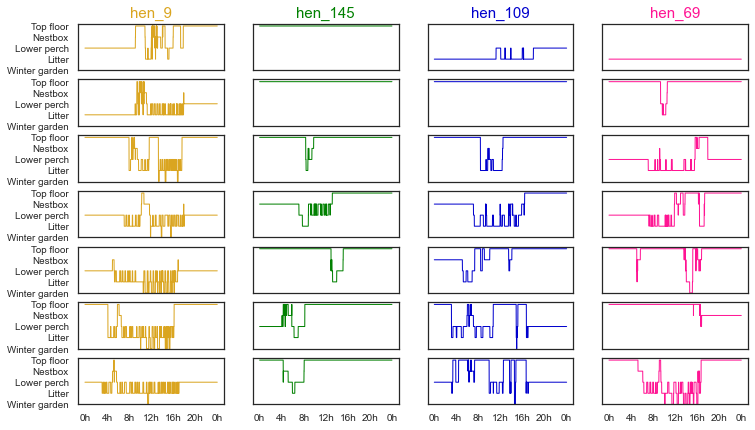

In [44]:
c = len(li_hen_visual)
#remove week 1 as not used in estimating individual estimates
li_date = df_MVT_ALL[df_MVT_ALL['WIB']!=1]['WIB'].unique()
l = len(li_date)
img_w = 3 #shape[1]
img_h = 1 #shape[0]
dico_zone_order = {'1_Zone':0, '2_Zone':1, '3_Zone':2, '4_Zone':3, '5_Zone':4} #to sort the yaxis
i = 0
fig = plt.figure(figsize=(int(c*img_w), int(l*img_h)))
for x in tqdm.tqdm(range(len(li_date))):
    for henID in li_hen_visual:
        d = dico_hen_DIB[henID][x]
        plt.subplot(l,c,i+1)
        i = i+1
        #keep the previous day to have a full time serie (not missing info before any transitions occured that day)
        #-8 for hens that did not moved during several consecutive days
        df_plt = df_rawmvt[((d-dt.timedelta(hours=24*8))<=df_rawmvt['date'])&(df_rawmvt['date']<=d)\
                           &(df_rawmvt['HenID']==henID)].copy()
        df_plt = df_plt.sort_values(['Timestamp']).copy()
        Daterange = pd.date_range(start=d-dt.timedelta(hours=10), end=d+dt.timedelta(hours=24), freq='S') 
        df_plt.set_index('Timestamp', inplace=True)
        df_plt_ = df_plt.reindex(Daterange, method='ffill').reset_index()
        df_plt_.rename(columns={'index':'Timestamp'}, inplace=True)
        #add date again, as the reindexing also extended the date
        df_plt_['date'] = df_plt_['Timestamp'].map(lambda x: dt.datetime.date(x))
        #keep only the date of interest
        df_plt_ = df_plt_[df_plt_['date']==dt.datetime.date(d)]
        #put xlabel into numbers for the ploting
        df_plt_['Zone'] = df_plt_['Zone'].map(lambda x: int(dico_zone_order[x]))    
        plt.plot(df_plt_['Timestamp'].tolist(), df_plt_['Zone'].tolist(), linewidth=1, color=pal_[henID])
        #add title on the top figure only
        if i<=c:
            plt.title(henID, size=15, color=pal_[henID]) #as small verification
        #remove x and y axis annotations
        plt.xticks([])
        plt.yticks([])
        #except: y-axis info on the right figures only
        if i%c==1:
            plt.yticks([0,1,2,3,4], ['Winter garden', 'Litter', 'Lower perch','Nestbox','Top floor'])
            plt.yticks(fontsize=9.8)
        #except: x-axis info on the bottom figures only
        if i>(l*c-c):
            li_hour = pd.date_range(start = d,  end = d+dt.timedelta(days=1), freq = '4H') #xlabel: every 4h for readibility
            plt.xticks(li_hour, [str(i.hour)+'h' for i in li_hour], fontsize=10)      
            plt.yticks(fontsize=9.8)
        plt.ylim(0, 4.2)     
plt.savefig(os.path.join(path_adapt, 'Rawdata.png'), bbox_inches='tight', dpi=400)